# Build More Classification Models
- Here, we are going to use different classification models as a classifier and we will evaluate which algorithm is working better for this use case.

### Problem Statement:
    - Using a machine learning model we need to classify which data belongs to which class i.e. cuisine.
    
### Steps:
    - Importing important libraries.
    - Importing dataset.
    - Spliting data into dependent and independent data.
    - Splitting into traning and testing data.
    - Creating models.
    - Evaluating models.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn

In [2]:
# Importing important Libraries.
import pandas as pd
import numpy as np

# Importing Classification Models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Importing metrics for evaluation.
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve,recall_score

In [3]:
# Importing Dataset
cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting data into dependent and independent
    - cuisines_label_df as a dependent variable.
    - cuisines_feature_df as Independent variable.

In [4]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [5]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Try different classifiers
- Random Forest Classifier.
- Support vector machine.
- K-nearest Neghibour.
- ADA Boost.

## Splitting into traning and tes4ting dataset.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

# Creating Models

In [7]:
C = 10
# Create different classifiers.
classifiers = {'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0),
               'KNN classifier': KNeighborsClassifier(C),
               'SVC': SVC(),
               'RFST': RandomForestClassifier(n_estimators=100),
               'ADA': AdaBoostClassifier(n_estimators=100)}


# Evaluation  

In [8]:
n_classifiers = len(classifiers)
lst_models = []
lst_accuracy = []

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lst_accuracy.append(accuracy)
    lst_models.append(name)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print("-"*100)
    print(classification_report(y_test,y_pred))
    print("="*100)

Accuracy (train) for Linear SVC: 76.8% 
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     chinese       0.64      0.72      0.68       240
      indian       0.90      0.88      0.89       243
    japanese       0.78      0.77      0.77       271
      korean       0.82      0.68      0.75       220
        thai       0.73      0.78      0.75       225

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Accuracy (train) for KNN classifier: 72.1% 
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     chinese       0.67      0.62      0.64       240
      indian       0.83      0.84      0.84       243
    japanese       0.66      0.81      0.73       271
      ko

In [9]:
chart = pd.DataFrame(index=None)

In [10]:
chart["Models"] = lst_models
chart["Accuracy"] = lst_accuracy

In [11]:
chart

,Models,Accuracy
0,Linear SVC,0.768140
1,KNN classifier,0.721435
2,SVC,0.807339
3,RFST,0.823186
4,ADA,0.724771


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphical Representation of Accuracy

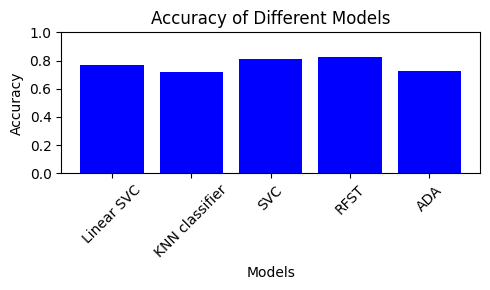

In [13]:
plt.figure(figsize=(5, 3))
plt.bar(chart['Models'], chart['Accuracy'], color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()